# Scaling

Scaling changes the range of features in our dataset.

Scaling

- why
    - some model types can be thrown off by different feature scales
    - improves most model's implementation
    - visualize the combination of 2 variables with different scales
    - a better interpretation of the data (e.g. log scaling)
    - combining features
- when
    - data prep / exploration
    - pipeline: prep
    - lifecycle: prep/exploration
    - when one of the conditions above is met. Otherwise, it's better to work with the original units
- where
    - the training dataset
    - usually just the independent variables
    - indep vars are scaled independently, i.e. the scaling of one feature doesn't affect the scaling of another
    - scale whatever goes into the model
- how
    - `sklearn.preprocessing` -- requires 2d array
    - make the thing, fit the thing, use the thing
    - `.fit` to learn parameters, `.transform` to apply the scaling
    - seperate scaled dataframes and/or columns

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pydataset

from sklearn.neighbors import KNeighborsClassifier

#need to add this line to get plots to show!
%matplotlib inline

## Why Scale? A Motivating Example

Goals: predict the flavor of ice cream

Note: for the purposes of the demo, we will only be looking at train and validate

In [2]:
train = pd.read_csv('https://gist.githubusercontent.com/zgulde/\
66989745314d2c68ab62fae13743f094/raw/71635c6281b5e2a36e3eb4578cab277eb09743ec/train.csv')
validate = pd.read_csv('https://gist.githubusercontent.com/zgulde/\
66989745314d2c68ab62fae13743f094/raw/71635c6281b5e2a36e3eb4578cab277eb09743ec/test.csv')

In [3]:
print('train shape:', train.shape)
print('validate shape:', validate.shape)

train shape: (90, 3)
validate shape: (10, 3)


In [4]:
train.head()

,flavor,pints,n_sprinkles
0,blueberry,7.675963,921.808798
1,blueberry,7.129386,1186.329821
2,pistachio,12.182332,443.310335
3,pistachio,13.955832,832.502384
4,chocolate,10.748216,892.000000


In [5]:
train.describe()

,pints,n_sprinkles
count,90.000000,90.000000
mean,9.901785,953.269692
std,2.599732,284.729092
min,4.556924,243.566135
25%,7.679667,777.995132
50%,10.153874,973.308340
75%,12.073098,1116.198313
max,14.253336,1675.374720


In [6]:
X_train, X_validate = train[['pints', 'n_sprinkles']], validate[['pints', 'n_sprinkles']]

y_train, y_validate = train.flavor, validate.flavor

In [7]:
# make the thing
model = KNeighborsClassifier(n_neighbors=3)

# fit the thing
model.fit(X_train, y_train)

# use the thing
model.score(X_validate, y_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.3

### Scale the data
1. make the thing
2. fit the thing
3. use the thing

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
train.head()

,flavor,pints,n_sprinkles
0,blueberry,7.675963,921.808798
1,blueberry,7.129386,1186.329821
2,pistachio,12.182332,443.310335
3,pistachio,13.955832,832.502384
4,chocolate,10.748216,892.000000


In [10]:
#making our scaler
scaler = MinMaxScaler()

#fitting our scaler 
# AND!!!!
#using the scaler on train
X_train_scaled = scaler.fit_transform(X_train)

#using our scaler on validate
X_validate_scaler = scaler.transform(X_validate)

In [11]:
X_train_scaled[:5]

array([[0.32166942, 0.47369646],
       [0.26530034, 0.65844254],
       [0.7864154 , 0.13950482],
       [0.96931818, 0.41132331],
       [0.63851367, 0.45287748]])

#### now re-fit our model with scaled data and score

In [12]:
#make the thing (its already made)
model = KNeighborsClassifier(n_neighbors=3)

#fit the thing
model.fit(X_train_scaled, y_train)

#use the thing
model.score(X_validate_scaler, y_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8

What's going on?

In [13]:
train.head()

,flavor,pints,n_sprinkles
0,blueberry,7.675963,921.808798
1,blueberry,7.129386,1186.329821
2,pistachio,12.182332,443.310335
3,pistachio,13.955832,832.502384
4,chocolate,10.748216,892.000000


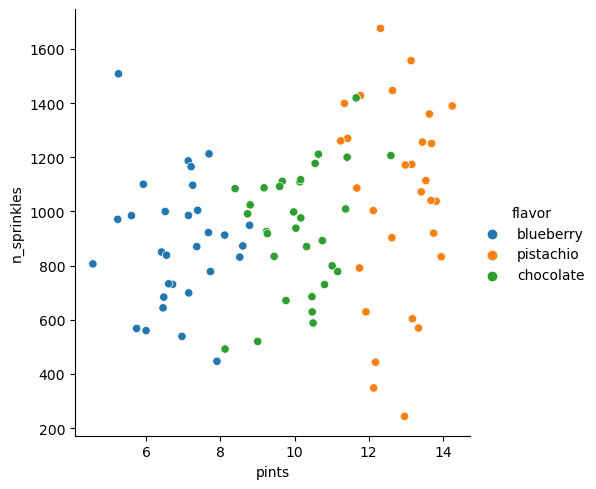

In [14]:
sns.relplot(data=train, y='n_sprinkles', x='pints', hue='flavor')
# plt.show()

(-800.0, 800.0)

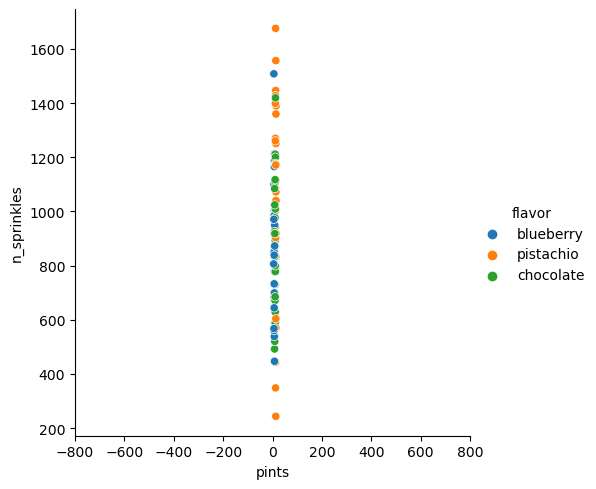

In [15]:
sns.relplot(data=train, y='n_sprinkles', x='pints', hue='flavor')
plt.xlim(-800, 800)
# plt.show()

Distance between 2 points

$$
\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

### Another Example

Dataset: demographics and self-reported scores for the ACT, SAT Verbal, and SAT Quantitative

In [16]:
df = pydataset.data('sat.act')
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0


#### how does gender relate each test score? 

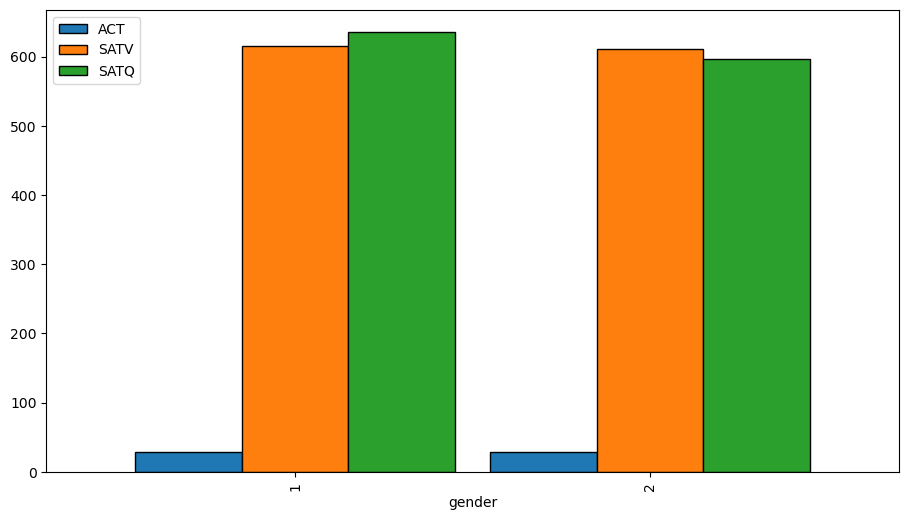

In [17]:
df[['gender', 'ACT', 'SATV', 'SATQ']].groupby('gender').mean()\
.plot.bar(figsize=(11, 6), ec='black', width=.9)
plt.show()

#### lets scale our scores

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# defining my columns explicitly to scale
cols = ['ACT', 'SATQ', 'SATV']

# making my scaler object
scaler = StandardScaler()

# calling my fit_transform (note i dont have a train/test)
# reassign those transformed values back into the dataframe
df[cols] = scaler.fit_transform(df[cols])

In [20]:
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,-0.943368,-0.994792,-0.953804
29457,2,3,23,1.338736,-0.108439,-0.953804
29498,2,3,20,-1.565760,-1.172062,-1.213420
29503,1,4,27,-0.528440,-0.551615,-0.780726
29504,1,2,33,0.508880,-0.108439,-0.521110


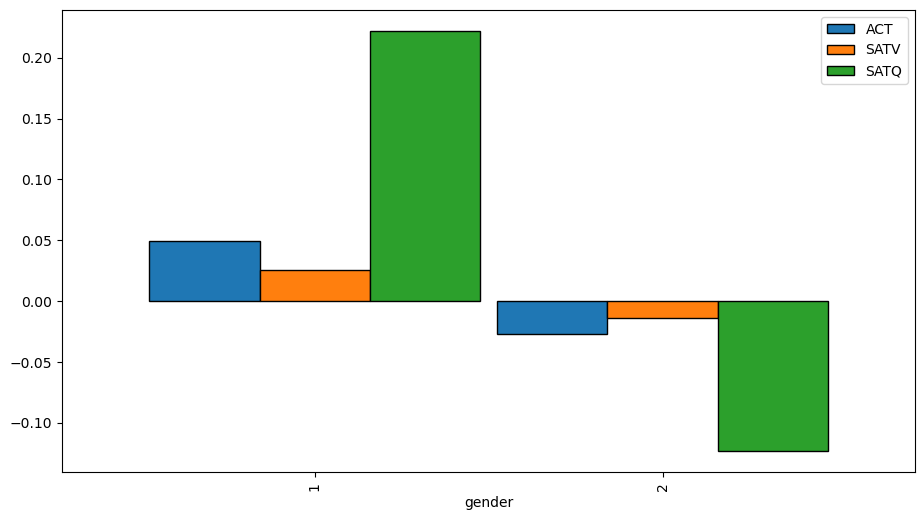

In [21]:
# grouping and plotting as we did before
df[['gender', 'ACT', 'SATV', 'SATQ']].groupby('gender').mean()\
.plot.bar(figsize=(11, 6), ec='black', width=.95);
plt.show()

## Linear Scaling

- Units are changed, but the distance between points is preserved.

- MinMax: everything between 0 and 1

    $$ x' = \frac{x - \text{max}(x)}{\text{max}(x) - \text{min}(x)} $$

- Standard: a zscore, standard deviations from the mean, **center** + **scale**

    $$ x' = \frac{x - \bar{x}}{s_x} $$

    - **centering**: subtracting the mean
    - **scaling**: dividing by the standard deviation

- Robust: robust to and preserves outliers

    $$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$

In [22]:
scaling_example = pd.DataFrame()
scaling_example['x1'] = np.arange(1, 11)
scaling_example['x2'] = [-100, -1, 0, 1, 2, 3, 4, 5, 100, 1000]

In [23]:
scaling_example

,x1,x2
0,1,-100
1,2,-1
2,3,0
3,4,1
4,5,2
5,6,3
6,7,4
7,8,5
8,9,100
9,10,1000


When scaling a single column, make sure to pass it to the scaler object as a dataframe, not as a series.

In [24]:
# scaling this
# one column:
scaler = MinMaxScaler()
scaler.fit_transform(scaling_example[['x1']])

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

#### linear scalers for both columns

In [25]:
scaler = MinMaxScaler()
scaling_example[['x1_minmax', 'x2_minmax']] = scaler.fit_transform(scaling_example[['x1','x2']])

In [26]:
scaler = StandardScaler()
scaling_example[['x1_standard', 'x2_standard']] = scaler.fit_transform(scaling_example[['x1','x2']])

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scaler = RobustScaler()
scaling_example[['x1_robust', 'x2_robust']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

In [29]:
scaling_example[sorted(scaling_example)]

,x1,x1_minmax,x1_robust,x1_standard,x2,x2_minmax,x2_robust,x2_standard
0,1,0.000000,-1.000000,-1.566699,-100,0.000000,-22.777778,-0.664996
1,2,0.111111,-0.777778,-1.218544,-1,0.090000,-0.777778,-0.338111
2,3,0.222222,-0.555556,-0.870388,0,0.090909,-0.555556,-0.334809
3,4,0.333333,-0.333333,-0.522233,1,0.091818,-0.333333,-0.331507
4,5,0.444444,-0.111111,-0.174078,2,0.092727,-0.111111,-0.328205
5,6,0.555556,0.111111,0.174078,3,0.093636,0.111111,-0.324904
6,7,0.666667,0.333333,0.522233,4,0.094545,0.333333,-0.321602
7,8,0.777778,0.555556,0.870388,5,0.095455,0.555556,-0.318300
8,9,0.888889,0.777778,1.218544,100,0.181818,21.666667,-0.004623
9,10,1.000000,1.000000,1.566699,1000,1.000000,221.666667,2.967056


In [30]:
import matplotlib.pyplot as plt

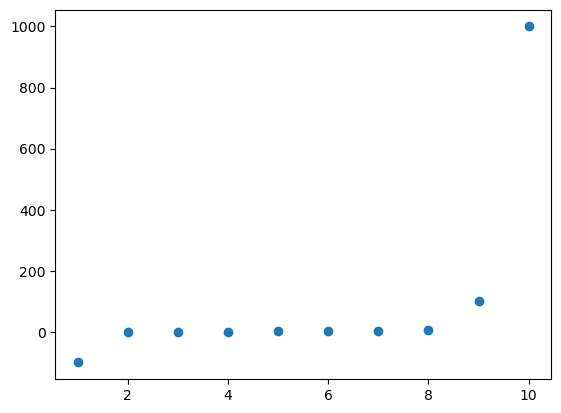

In [31]:
plt.scatter(scaling_example.x1, scaling_example.x2)

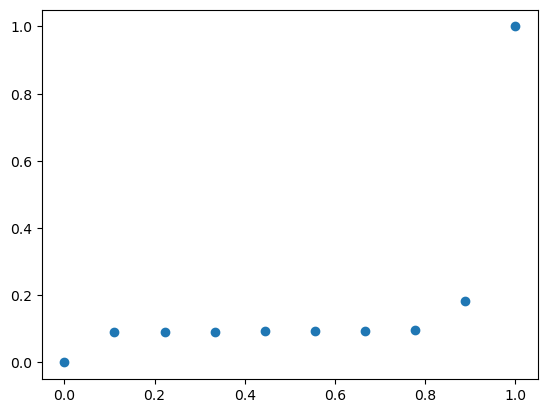

In [32]:
plt.scatter(scaling_example.x1_minmax, scaling_example.x2_minmax);
plt.show()

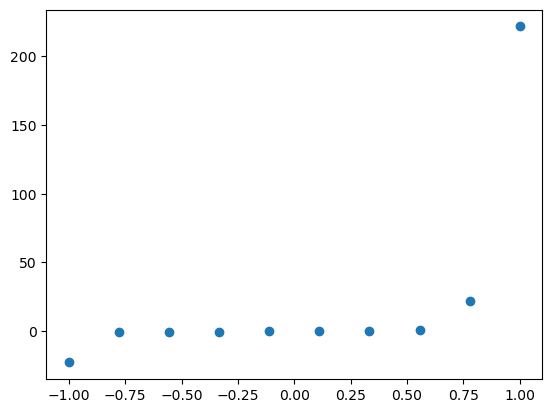

In [33]:
plt.scatter(scaling_example.x1_robust, scaling_example.x2_robust);

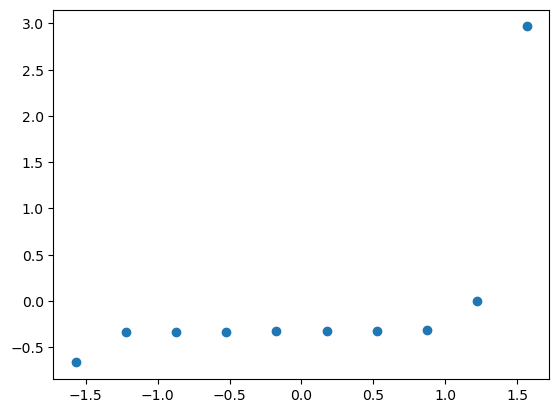

In [34]:
plt.scatter(scaling_example.x1_standard, scaling_example.x2_standard);

## Non-linear Scaling

- The distance between points is **not** preserved, but order is
- Not as common as linear scalers
- In sklearn: 
    - power transformation: box-cox, yeo-johnson;
    - quantile transformation
- Log

    $$ x' = \log_b{x} $$

    $$ b^{x'} = x $$

    Sometimes you can just set the x/y scale w/ matplotlib instead of
    actually transforming the data

In [35]:
np.random.seed(1)
n = 100

df = pd.DataFrame()
df['x1'] = np.random.randn(n)
df['x2'] = 10 ** (df.x1 + np.random.randn(n) * .5)

In [36]:
df.head()

,x1,x2
0,1.624345,25.164081
1,-0.611756,1.001146
2,-0.528172,0.471600
3,-1.072969,0.167425
4,0.865408,2.079465


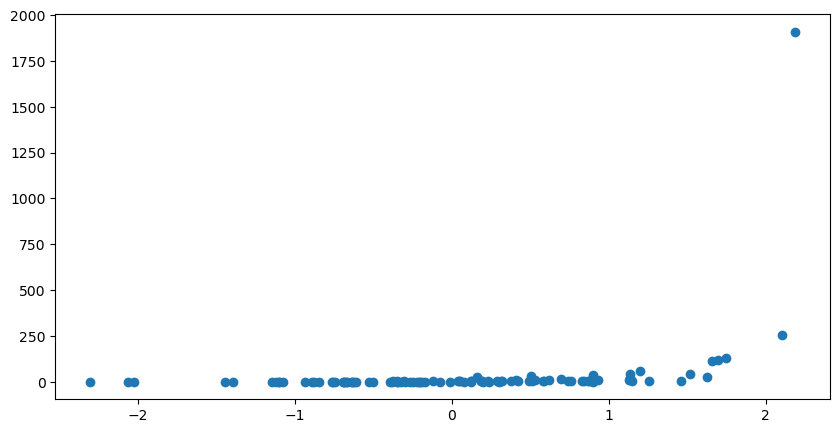

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df.x1, df.x2)
plt.show()

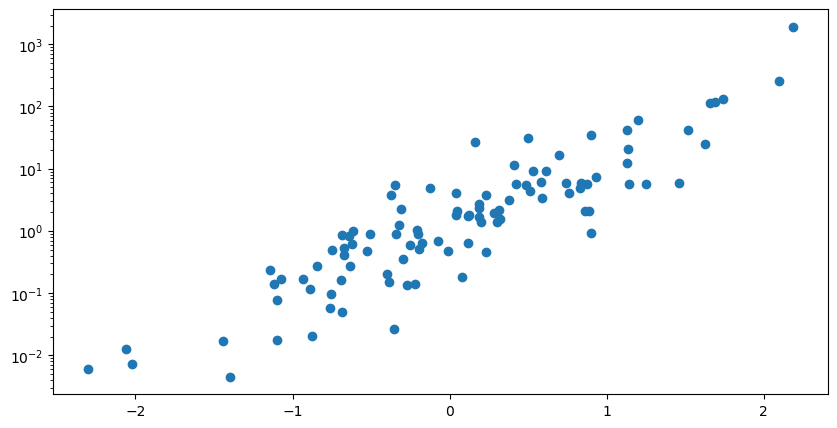

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df.x1, df.x2)
ax.set_yscale('log')
# plt.show()

If we want to predict $y$ based on $x$ and there is a linear relationship between them, the model

$$ y = mx + b $$

works pretty well.

However, if the relationship is exponential, that model does not make great predictions, but instead we could transform x:

$$ y = m(log(x)) + b $$

And still get decent predictions

## Recap

- Generally use unscaled data for exploration
- Use scaled data for modeling, typically min-max scaler
- Learn parameters for scaling from the training split